# Machine Learning Project - Predicting Housing Price In Ames, Iowa

> We have the duty of **formulating**, of **summarizing**, and of **communicating our conclusions**, in intelligible form, in recognition of the right of other free minds to utilize them in making their own decisions.
>
> --_Ronald Fisher_

This Jupyter notebook incorporates exploratory data analysis, the process of dropping variables/columns, data imputation. The main objective is to get a general sense of the data, perform part of the feature engineering and data transformation.

<a id='top'></a>
## Table of Contents

* [1. Exploratory Data Analysis](#EDA)
 * [1.0 Dataframe Overview](#Overview)
 * [1.1 Missingness](#Missingness)
 * [1.2 Inbalances](#Inbalance)
 * [1.3 Correlation Check](#Correlation)
* [2. Exploring Variables](#Variable_Exploration)
 * [2.1 Take a look at SalePrice](#SalePrice)
* [3. Feature Engineering](#feature)




<a id='EDA'></a>

## 1. Exploratory Data Analysis

<a id='Overview'></a>

### 1.0 Dataframe Overview

In [1]:
# Import Data Analysis Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import power_transform
from scipy import stats
from  matplotlib.ticker import PercentFormatter

In [2]:
# Import Data
filePath  = './data/'
df_train = pd.read_csv(filePath + "train.csv")
df_test = pd.read_csv(filePath + "test.csv")

In [3]:
print(df_train.shape) # training dataframe contains 1460 observations with 81 variables, including SalePrice
print(df_test.shape)  # test dataframe contains 1459 observations with 80 variables

(1460, 81)
(1459, 80)


In [4]:
# df_train.head()

In [5]:
# df_test.head()

In [6]:
df_train.dtypes.value_counts() 
# Out of 81 variables, we have 43 categorical/qualitative variables, 38 quantitative variables
# test dataset has one less variable SalePrice

object     43
int64      35
float64     3
dtype: int64

In [7]:
# list of categorical variables
obj_list = list(df_train.columns[df_train.dtypes == 'object'])
print(obj_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
# list of quantitative variables Id/Saleprice would be need to be removed later 
num_list = list(df_train.columns[df_train.dtypes != 'object'])
num_list.remove('Id')
num_list.remove('SalePrice')
print(num_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
train_saleprice = df_train.SalePrice

In [10]:
train_id = df_train.Id
df_train.drop('Id', axis = 1, inplace = True)
test_id = df_test.Id
df_test.drop('Id', axis = 1, inplace = True)

In [11]:
# df_train[num_list].describe()

[Back To Top](#top)

<a id='Missingness'></a>
### 1.1 Missingness

In [908]:
# Overall Missingness training set
total_nan = df_train.isnull().sum().sum()
print("Total NaN in training Dataframe: " , total_nan)
print("Percent Missingness in Dataframe: ", 100*total_nan/(len(df_train.index)*len(df_train.columns)))
# Overall Missingness test set 
print('・ω・'*20)
total_nan = df_test.isnull().sum().sum()
print("Total NaN in testing Dataframe: " , total_nan)
print("Percent Missingness in Dataframe: ", 100*total_nan/(len(df_test.index)*len(df_test.columns)))
# There seems to be more missing data with the test data

Total NaN in training Dataframe:  6965
Percent Missingness in Dataframe:  5.889565364451209
・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・
Total NaN in testing Dataframe:  7000
Percent Missingness in Dataframe:  5.9972583961617545


In [909]:
# Missingness of categorical variables
obj_miss_percent_train = {}
for i in range(len(obj_list)):
#     print('-'*55)
#     print(df_train[obj_list[i]].value_counts())
    missing_value = df_train[obj_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    obj_miss_percent_train[obj_list[i]] = missing_percentage
#     print('Number of missing values in %s is %d'%(obj_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(obj_list[i], missing_percentage))

In [910]:
# Missingness of categorical variables
obj_miss_percent_test = {}
for i in range(len(obj_list)):
#     print('-'*55)
#     print(df_train[obj_list[i]].value_counts())
    missing_value = df_test[obj_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_test)
    obj_miss_percent_test[obj_list[i]] = missing_percentage
#     print('Number of missing values in %s is %d'%(obj_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(obj_list[i], missing_percentage))

In [911]:
# Missingness of numerical variables (training)
num_miss_percent_train = {}
for i in range(len(num_list)):
#     print('-'*55)
#     print(df_train[num_list[i]].value_counts())
    missing_value = df_train[num_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    num_miss_percent_train[num_list[i]] =  missing_percentage
#     print('Number of missing values in %s is %d'%(num_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(num_list[i], missing_percentage))

In [912]:
# Missingness of numerical variables (testing)
num_miss_percent_test = {}
for i in range(len(num_list)):
#     print('-'*55)
#     print(df_train[num_list[i]].value_counts())
    missing_value = df_test[num_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_test)
    num_miss_percent_test[num_list[i]] =  missing_percentage
#     print('Number of missing values in %s is %d'%(num_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(num_list[i], missing_percentage))

In [913]:
perc_missing_train = {**obj_miss_percent_train, **num_miss_percent_train}
perc_missing_train = pd.DataFrame(perc_missing_train.items(), columns=['Variable', 'Missingness'])
perc_missing_train = perc_missing_train[perc_missing_train.Missingness > 0]
perc_missing_train.sort_values('Missingness', ascending = False, inplace = True)

In [914]:
perc_missing_test = {**obj_miss_percent_test, **num_miss_percent_test}
perc_missing_test = pd.DataFrame(perc_missing_test.items(), columns=['Variable', 'Missingness'])
perc_missing_test = perc_missing_test[perc_missing_test.Missingness > 0]
perc_missing_test.sort_values('Missingness', ascending = False, inplace = True)

In [915]:
# for those variables with missing values, we print the value counts

# for i in range(len(perc_missing)):
#     print(perc_missing.index[i])
#     print('-'*15)
#     print(df_train[perc_missing.index[i]].value_counts())
#     print('-'*55)

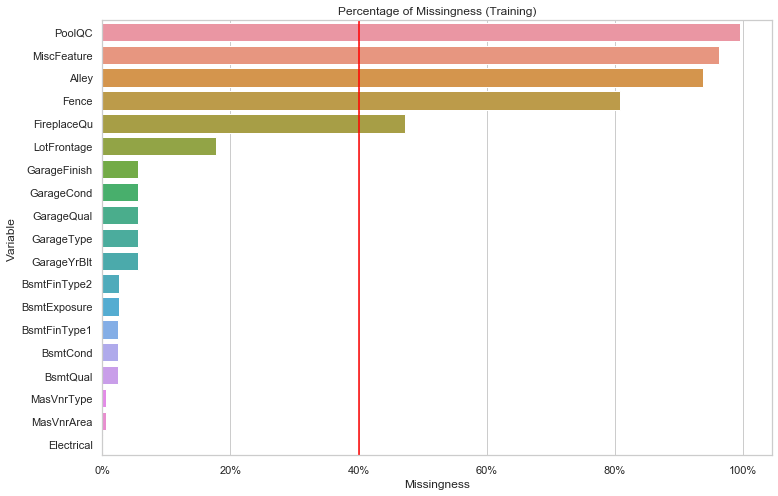

In [916]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
perc_bar = sns.barplot(y = 'Variable', x = 'Missingness', data = perc_missing_train, ax = ax)
perc_bar.set(title = 'Percentage of Missingness (Training)')
plt.axvline(x = 0.4, color='red')

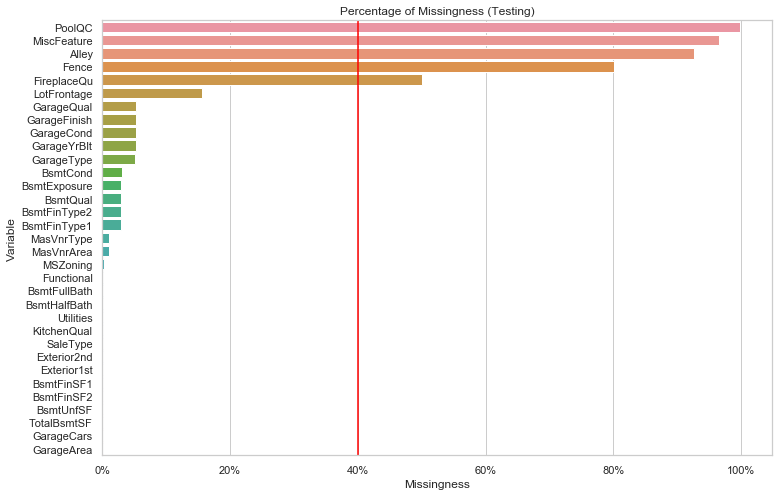

In [917]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
perc_bar = sns.barplot(y = 'Variable', x = 'Missingness', data = perc_missing_test, ax = ax)
perc_bar.set(title = 'Percentage of Missingness (Testing)')
plt.axvline(x = 0.4, color='red')

In [918]:
# Number of missing variables for training set
print('Number of variables having missing values is ' + str(len(perc_missing_train)))

Number of variables having missing values is 19


In [919]:
# Number of missing variables for testing set
print('Number of variables having missing values is ' + str(len(perc_missing_test)))

Number of variables having missing values is 33


By looking at the barplot above, we decided to first drop the columns with greater than 40% missingness, the dropped columns are as follows. NAs mostly mean that the corresponding house doesn't have certain things, pools, fences for example. We may add those variables back for predicting those houses with higher values.

In [920]:
dropped_columns_train = perc_missing_train[perc_missing_train.Missingness > 0.4].Variable.values
dropped_columns_test = perc_missing_test[perc_missing_test.Missingness > 0.4].Variable.values
dropped_columns = set(dropped_columns_train + dropped_columns_test)
dropped_columns

{'AlleyAlley',
 'FenceFence',
 'FireplaceQuFireplaceQu',
 'MiscFeatureMiscFeature',
 'PoolQCPoolQC'}

Other check for missingness, the following function checks None, negatives or empty strings

In [921]:
def data_eval(df):
    for i in range(len(df.columns)):
        print('-'*50)
        print('Column Name: ', df.columns[i])
        if (df[df.columns[i]].dtypes == 'float64' or df[df.columns[i]].dtypes == 'int64') and \
        df[df.columns[i]][df[df.columns[i]]<0].count()>0:
            print('Number of negatives: ', df[df.columns[i]][df[df.columns[i]]<0].count())
        if df[df.columns[i]][df[df.columns[i]]=='None'].count() > 0:
            print('Number of None strings: ', df[df.columns[i]][df[df.columns[i]]=='None'].count())
        if df[df.columns[i]][df[df.columns[i]]==''].count() > 0:
            print('Number of empty strings: ', df[df.columns[i]][df[df.columns[i]]==''].count())
        else:
            print('Column ' + df.columns[i] + ' has no negatives, empty strings or Nones')

In [922]:
# data_eval(df_train) # It turns out that the dataframe is quite clean, with none of those

In [923]:
# helper function to obtain the number of missing values for each row
def row_na_list(df, value):
    l=[]
    for i in range(len(df.index)) :
        if df.iloc[i].isnull().sum() > value:
            l.append([i, df.iloc[i].isnull().sum()])
    return l

# value=10
# row_na = row_na_list(df_train,value)
# print('Number of Rows with missingness greater than ' + str(value) + ': ' + str(len(row_na)))
# print('Minimum percentage missingness: ', 100*(value+1)/len(df_train.columns))
# for i in range(len(row_na)):
#     print('-'*50)
#     print('Row ' + str(row_na[i][0]) + ' with ' +str(100*row_na[i][1]/len(df_train.columns)) 
#           + ' percent missingness')
#     print('Number of missing entries in row: ', row_na[i][1])

[Back To Top](#top)

<a id='Inbalance'></a>
### 1.2 Inbalances

We noticed that for some variables, if we do a value count, one single value accounts for more than 80% of all the values, we decided to remove those variables for now as they don't add much information to the regression. In the later stage of the project, we will consider them case by case if we need to add them back to the model.

In [924]:
def inbalance_check(df, value):
    inbalance_columns = []
    for i in range(df.shape[1]):
        if df[df.columns[i]].value_counts(normalize = True).values[0] > value:
            inbalance_columns.append((df.columns[i],df[df.columns[i]].value_counts(normalize = True).values[0]))
    return inbalance_columns

In [925]:
inbalance_columns = inbalance_check(df_train, 0.9)
inbalance_df = pd.DataFrame(inbalance_columns, columns = ["variable", "proportion"])
inbalance_df.sort_values('proportion', ascending = False, inplace = True)

[Text(0.5, 1.0, 'Inbalanced Variables (training)')]

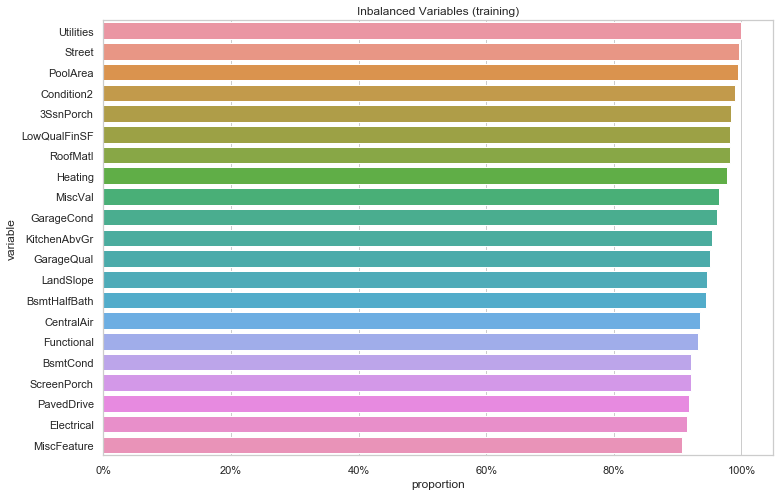

In [1253]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
inbala_plot = sns.barplot(y = "variable", x = "proportion", data = inbalance_df)
inbala_plot.set(title = 'Inbalanced Variables (training)')

In [927]:
inbalance_columns_test = inbalance_check(df_test, 0.9)
inbalance_df_test = pd.DataFrame(inbalance_columns_test, columns = ["variable", "proportion"])
inbalance_df_test.sort_values('proportion', ascending = False, inplace = True)

[Text(0.5, 1.0, 'Inbalanced Variables (testing)')]

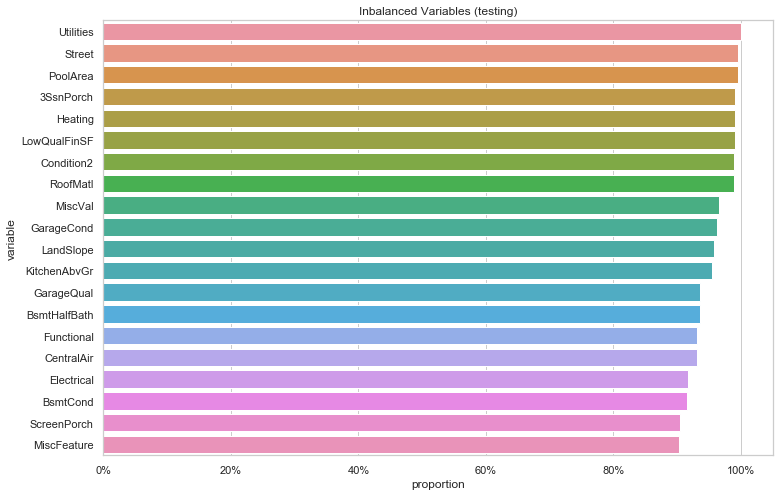

In [1254]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
inbala_plot = sns.barplot(y = "variable", x = "proportion", data = inbalance_df_test)
inbala_plot.set(title = 'Inbalanced Variables (testing)')

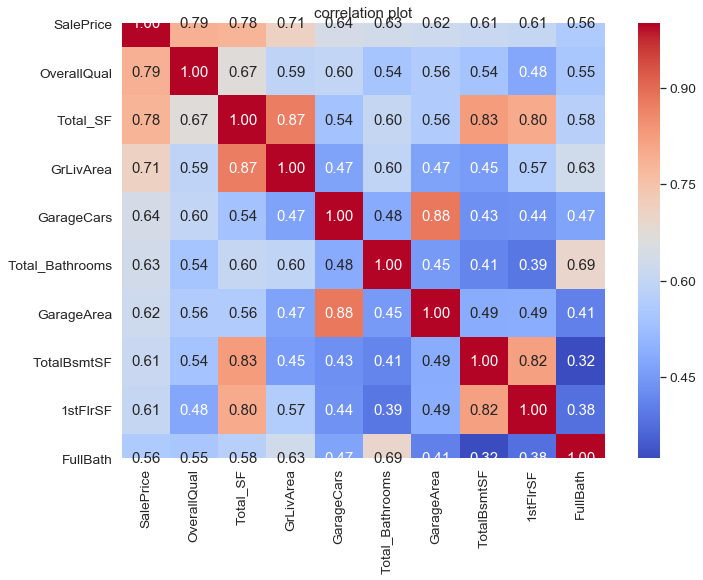

In [1303]:
corr_plot = df_train.corr()
f, ax = plt.subplots(figsize=(12, 8))
k = 10 #number of variables for heatmap
cols = corr_plot.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
ax.set_ylim(bottom = 0, top = 10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',  
                 yticklabels=cols.values, xticklabels=cols.values, cmap= 'coolwarm', ax = ax)
hm.set(title = "correlation plot")
plt.show()

[Back To Top](#top)

<a id='Correlation'></a>

### 1.3 Correlation Check

In [929]:
# Output a big correlation table

# df_train.corr()

In [930]:
# helper function searching for high correlation paris
def index_retrieve(df, value, measure):
    ''' Get index positions of value in dataframe.'''

    poslist = list()
    # Get bool dataframe with True at positions where the given value exists and filter out on-diagonal elements
    if measure == 'spearman':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    elif measure == 'pearson':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    # Get list of columns that contains the value
    series = result.any()
    columnNames = list(series[series == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            poslist.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    
    if value > 0:
        print('Number of correlations with value greater than ' + str(value) + ': ' + str(len(poslist)))
    if value < 0:
        print('Number of correlations with value less than ' + str(value) + ': ' + str(len(poslist)))
    else:
        pass
    for i in range(len(poslist)):
        print('-'*40)
        print('index labels: ', poslist[i][0], poslist[i][1])
        print('value at index: ', df.corr().loc[poslist[i]])
    
    return poslist

In [931]:
sig_cor_index_list = index_retrieve(df_train, 0.7, 'spearman')

Number of correlations with value greater than 0.7: 14
----------------------------------------
index labels:  SalePrice OverallQual
value at index:  0.7909816005838047
----------------------------------------
index labels:  GarageYrBlt YearBuilt
value at index:  0.8256674841743434
----------------------------------------
index labels:  GarageYrBlt YearRemodAdd
value at index:  0.6422767797035414
----------------------------------------
index labels:  1stFlrSF TotalBsmtSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotalBsmtSF 1stFlrSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotRmsAbvGrd GrLivArea
value at index:  0.8254893743088377
----------------------------------------
index labels:  SalePrice GrLivArea
value at index:  0.7086244776126511
----------------------------------------
index labels:  GrLivArea TotRmsAbvGrd
value at index:  0.8254893743088377
--------------------------------

In [1252]:
# spearman
print('top 10 Spearman correlation coefficient')
print(df_train.corr(method='spearman').SalePrice.sort_values(ascending=True).head(20))
print('-'*55)
# pearson
print('top 10 Pearson correlation coefficient')
print(df_train.corr().SalePrice.sort_values(ascending=True).head(10))

top 10 Spearman correlation coefficient
EnclosedPorch   -0.218394
KitchenAbvGr    -0.164826
OverallCond     -0.129325
LowQualFinSF    -0.067719
MiscVal         -0.062727
BsmtFinSF2      -0.038806
YrSold          -0.029899
BsmtHalfBath    -0.012189
MSSubClass       0.007192
PoolArea         0.058453
3SsnPorch        0.065440
MoSold           0.069432
ScreenPorch      0.100070
BsmtUnfSF        0.185197
BsmtFullBath     0.225125
BedroomAbvGr     0.234907
2ndFlrSF         0.293598
BsmtFinSF1       0.301871
HalfBath         0.343008
WoodDeckSF       0.353802
Name: SalePrice, dtype: float64
-------------------------------------------------------
top 10 Pearson correlation coefficient
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
Name: SalePrice, dtype: float64


[Back To Top](#top)

<a id='Variable_Exploration'></a>

## 2. Variable Exploration

<a id='SalePrice'></a>

### 2.1 SalePrice

## 3. Data Imputation

In [933]:
print(perc_missing_train.Variable.values)

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageFinish' 'GarageCond' 'GarageQual' 'GarageType' 'GarageYrBlt'
 'BsmtFinType2' 'BsmtExposure' 'BsmtFinType1' 'BsmtCond' 'BsmtQual'
 'MasVnrType' 'MasVnrArea' 'Electrical']


In [934]:
print(perc_missing_test.Variable.values)

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageQual' 'GarageFinish' 'GarageCond' 'GarageYrBlt' 'GarageType'
 'BsmtCond' 'BsmtExposure' 'BsmtQual' 'BsmtFinType2' 'BsmtFinType1'
 'MasVnrType' 'MasVnrArea' 'MSZoning' 'Functional' 'BsmtFullBath'
 'BsmtHalfBath' 'Utilities' 'KitchenQual' 'SaleType' 'Exterior2nd'
 'Exterior1st' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'GarageCars' 'GarageArea']


In [935]:
col_to_impute = list(set(list(perc_missing_train.Variable.values) + list(perc_missing_test.Variable.values)))

### 3.1 Pools

We will first look at pools, where pool-related variables have the highest missing percentage. There are two pool variables, pool area (numerical) and pool QC (categorical). Since NA for poolQC means no pools. We fill it with None. Also, this variable seems to be ordinal, we would assign numerical value to it.

In [936]:
df_train.PoolQC.fillna('None', inplace = True)
df_test.PoolQC.fillna('None', inplace = True)

In [937]:
df_train['PoolQC'] = df_train['PoolQC'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'None': 0})
df_test['PoolQC'] = df_test['PoolQC'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'None': 0})

We also want to see if there is any observation with pool area greater than 0 and with poolQC equal to 0 (i.e. None), we will then fix it.

In [938]:
df_train[(df_train.PoolQC == 0) & (df_train.PoolArea > 0)] # None for the training data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [939]:
df_test[(df_test.PoolQC == 0) & (df_test.PoolArea > 0)] 
# Three for the test data, and we will fix it according to the overall quality of the house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,0,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,0,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NaN,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,0,GdPrv,NaN,0,6,2007,WD,Normal


In [940]:
df_test.PoolQC.iloc[[960, 1043, 1139]] = [60, 70, 60] #Overall Quality goes from 0 to 10 assign accordingly

In [941]:
col_to_impute.remove('PoolQC')

### 3.2 Miscellaneous, Alley, Fence

In [942]:
df_train.MiscFeature.fillna('None', inplace = True)
df_test.MiscFeature.fillna('None', inplace = True)
# just fill it with None # Need a plot with average saleprice for each feature and the number of observations

For alley, it is quite similar, NA means None.

In [943]:
df_train.Alley.fillna('None', inplace = True)
df_test.Alley.fillna('None', inplace = True)
df_train.Fence.fillna('None', inplace = True)
df_test.Fence.fillna('None', inplace = True)

In [944]:
col_to_impute.remove('MiscFeature')
col_to_impute.remove('Alley')
col_to_impute.remove('Fence')

### 3.3 Fireplaces 

Pretty similar to pools, there are 2 fireplace variables. We convert it in the similar fashion

In [945]:
df_train.FireplaceQu.fillna('None', inplace = True)
df_test.FireplaceQu.fillna('None', inplace = True)

In [946]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
# Also, there are no missing values for the fireplace variables

In [947]:
col_to_impute.remove('FireplaceQu')

### 3.3 Garages

We will look into variables that associate with garage in this section. We replace missing garage built year with the building built year. As there is no information indicating whether garage is added during the remodeling, so we assume that the garage building year is the same as the building year of the house. If the house doesn't have a garage, then this variable would be irrelevant, so this imputation makes sense in this way.

In [948]:
garage_missing = ['GarageFinish', 'GarageCars', 'GarageCond', 'GarageArea', 'GarageQual', 'GarageType', 'GarageYrBlt']

In [949]:
df_train[garage_missing].isnull().sum()

GarageFinish    81
GarageCars       0
GarageCond      81
GarageArea       0
GarageQual      81
GarageType      81
GarageYrBlt     81
dtype: int64

In [950]:
df_test[garage_missing].isnull().sum()

GarageFinish    78
GarageCars       1
GarageCond      78
GarageArea       1
GarageQual      78
GarageType      76
GarageYrBlt     78
dtype: int64

In [951]:
df_train.GarageYrBlt.loc[df_train.GarageYrBlt.isnull()] = df_train.YearBuilt.loc[df_train.GarageYrBlt.isnull()]
df_test.GarageYrBlt.loc[df_test.GarageYrBlt.isnull()] = df_test.YearBuilt.loc[df_test.GarageYrBlt.isnull()]

Let's now take a look on how to impute GarageFinish, GarageCond, GarageQual and GarageType. For these four variables, NA simply means no garage.

In [952]:
print(len(df_train[(df_train.GarageFinish.isnull()) & (df_train.GarageCond.isnull()) & (df_train.GarageQual.isnull()) 
                   & (df_train.GarageType.isnull())]))  # all these four NAs are together in the training set
print(len(df_test[(df_test.GarageFinish.isnull()) & (df_test.GarageCond.isnull()) & (df_test.GarageQual.isnull()) &
        (df_test.GarageType.isnull())]))  # 76 of them are together, let's now find the 2 peculiar ones

81
76


In [953]:
df_test[(df_test.GarageFinish.isnull()) & (df_test.GarageCond.isnull()) & (df_test.GarageQual.isnull()) &
        (~df_test.GarageType.isnull())][garage_missing] # 666 seem to have a garage while 1116 doesn't

,GarageFinish,GarageCars,GarageCond,GarageArea,GarageQual,GarageType,GarageYrBlt
666,NaN,1.0,NaN,360.0,NaN,Detchd,1910.0
1116,NaN,NaN,NaN,NaN,NaN,Detchd,1923.0


In [954]:
df_test[garage_missing].mode()

,GarageFinish,GarageCars,GarageCond,GarageArea,GarageQual,GarageType,GarageYrBlt
0,Unf,2.0,TA,0.0,TA,Attchd,2005.0


In [955]:
# impute with mode
df_test.GarageFinish.iloc[666] = 'Unf'
df_test.GarageCond.iloc[666] = 'TA'
df_test.GarageQual.iloc[666] = 'TA'

In [956]:
# The missing GarageCars and GarageArea are due to 1116
df_test.GarageCars.iloc[1116] = 0
df_test.GarageArea.iloc[1116] = 0
df_test.GarageType.iloc[1116] = np.NaN

In [957]:
# Let's now impute GarageFinish, GarageCond, GarageQual, GarageType as usual

In [958]:
df_train.GarageFinish.fillna('None', inplace = True)
df_train.GarageCond.fillna('None', inplace = True)
df_train.GarageQual.fillna('None', inplace = True)
df_train.GarageType.fillna('None', inplace = True)
df_test.GarageFinish.fillna('None', inplace = True)
df_test.GarageCond.fillna('None', inplace = True)
df_test.GarageQual.fillna('None', inplace = True)
df_test.GarageType.fillna('None', inplace = True)

In [959]:
df_train['GarageFinish'] = df_train['GarageFinish'].map(
    {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
df_test['GarageFinish'] = df_test['GarageFinish'].map(
    {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
df_train['GarageCond'] = df_train['GarageCond'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['GarageCond'] = df_test['GarageCond'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_train['GarageQual'] = df_train['GarageQual'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['GarageQual'] = df_test['GarageQual'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})

In [960]:
for _ in garage_missing:
    col_to_impute.remove(_)

### 3.4 Lot 

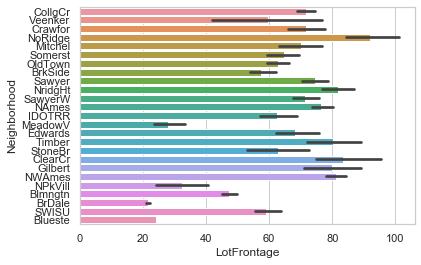

In [961]:
sns.barplot(y = 'Neighborhood', x = 'LotFrontage', data = df_train[~df_train.LotFrontage.isnull()])
# We can see that for each neighborhood, lotfrontage does have a difference, so we will impute according to the median
# of each neighborhood

In [962]:
neighbor_lot_dict = df_train.groupby('Neighborhood')['LotFrontage'].median().to_dict()

In [963]:
df_train.LotFrontage[df_train.LotFrontage.isnull()] = \
df_train.Neighborhood[df_train.LotFrontage.isnull()].map(neighbor_lot_dict)
df_test.LotFrontage[df_test.LotFrontage.isnull()] = \
df_test.Neighborhood[df_test.LotFrontage.isnull()].map(neighbor_lot_dict)

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [964]:
col_to_impute.remove('LotFrontage')

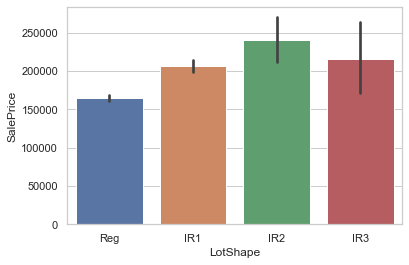

In [965]:
sns.barplot(y = 'SalePrice', x = 'LotShape', data = df_train) 
# there doesn't seem to have a pattern same with LotConfig

In [966]:
# According to the description, lotshape seems ordinal, we then map it
df_train['LotShape'] = df_train['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})
df_test['LotShape'] = df_test['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})

### 3.5 Basement Variables

In [967]:
basement_missing = ['BsmtHalfBath','BsmtQual','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtCond','BsmtFinType2','BsmtFullBath'] 
# There are 8 of them add 3 at the end (forgot ones ,hahaha)

In [968]:
# df_train[basement_missing].isnull().sum()

In [969]:
# df_test[basement_missing].isnull().sum()

In [970]:
len(df_train[df_train.BsmtQual.isnull() & df_train.BsmtExposure.isnull() & df_train.BsmtFinType1.isnull()
        & df_train.BsmtFinType2.isnull() & df_train.BsmtCond.isnull()]) # They all appear in the 37 observations

37

In [971]:
df_train[(~df_train.BsmtQual.isnull()) & (df_train.BsmtExposure.isnull()|df_train.BsmtFinType2.isnull()) 
         & (~df_train.BsmtFinType1.isnull()) & (~df_train.BsmtCond.isnull())][basement_missing]
# One missing in exposure

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
332,0,Gd,No,GLQ,1124,TA,NaN,1
948,0,Gd,NaN,Unf,0,TA,Unf,0


In [972]:
len(df_test[df_test.BsmtQual.isnull() & df_test.BsmtExposure.isnull() & df_test.BsmtFinType1.isnull()
        & df_test.BsmtFinType2.isnull() & df_test.BsmtCond.isnull() & df_test.BsmtHalfBath.isnull()
            & df_test.BsmtFullBath.isnull() & df_test.BsmtFinSF1.isnull()])
# After playing around, we can see that these missing variables are all contained in 45 observations

1

In [973]:
df_test[(~df_test.BsmtFinType1.isnull()) & 
        (df_test.BsmtQual.isnull() | df_test.BsmtExposure.isnull() | df_test.BsmtCond.isnull() 
         | df_test.BsmtHalfBath.isnull() | df_test.BsmtFullBath.isnull() 
         | df_test.BsmtFinSF1.isnull())][basement_missing] # A table of part of the missing values

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
27,0.0,Gd,NaN,Unf,0.0,TA,Unf,0.0
580,0.0,Gd,Mn,GLQ,1044.0,NaN,Rec,1.0
725,1.0,TA,No,BLQ,1033.0,NaN,Unf,0.0
757,0.0,NaN,No,Unf,0.0,Fa,Unf,0.0
758,0.0,NaN,No,Unf,0.0,TA,Unf,0.0
888,0.0,Gd,NaN,Unf,0.0,TA,Unf,0.0
1064,0.0,TA,Av,ALQ,755.0,NaN,Unf,0.0


In [974]:
# We impute with the mode
df_train[basement_missing].mode()

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
0,0,TA,No,Unf,0,TA,Unf,0


In [975]:
df_test[basement_missing].mode()

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
0,0.0,TA,No,GLQ,0.0,TA,Unf,0.0


In [976]:
df_train.BsmtFinType2.iloc[332] = 'Unf'
df_train.BsmtExposure.iloc[948] = 'No'
df_test.BsmtQual.iloc[[757,758]] = 'TA'
df_test.BsmtExposure.iloc[[27,888]] = 'No'
df_test.BsmtCond.iloc[[580,725,1064]] = 'TA'

In [977]:
df_train.BsmtFinType2.fillna('None', inplace = True)
df_train.BsmtExposure.fillna('None', inplace = True)
df_train.BsmtFinType1.fillna('None', inplace = True)
df_train.BsmtCond.fillna('None', inplace = True)
df_train.BsmtQual.fillna('None', inplace = True)
df_test.BsmtFinType2.fillna('None', inplace = True)
df_test.BsmtExposure.fillna('None', inplace = True)
df_test.BsmtFinType1.fillna('None', inplace = True)
df_test.BsmtCond.fillna('None', inplace = True)
df_test.BsmtQual.fillna('None', inplace = True)

In [978]:
# These five variables are ordinal, we map it to some value
df_train['BsmtQual'] = df_train['BsmtQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['BsmtQual'] = df_test['BsmtQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'None': 0, 'No' : 1, 'Mn' : 3, 'Av' : 4, 'Gd' : 5})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'None': 0, 'No' : 1, 'Mn' : 3, 'Av' : 4, 'Gd' : 5})
df_train['BsmtCond'] = df_train['BsmtCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [979]:
# There are still some remaining NAs, we fill them now.
df_test[df_test.BsmtHalfBath.isnull() | df_test.BsmtFinSF1.isnull() | 
        df_test.BsmtFullBath.isnull()][basement_missing]
# It is apparent that for those two houses, there are no basement, we change it to zero

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
660,NaN,0,0,0,NaN,0,0,NaN
728,NaN,0,0,0,0.0,0,0,NaN


In [980]:
df_test.BsmtHalfBath.iloc[[660,728]] = 0
df_test.BsmtFullBath.iloc[[660,728]] = 0
df_test.BsmtFinSF1.iloc[[660]] = 0
df_test.BsmtUnfSF.iloc[[660]] = 0
df_test.BsmtFinSF2.iloc[[660]] = 0
df_test.TotalBsmtSF.iloc[[660]] = 0

In [981]:
for _ in basement_missing:
    col_to_impute.remove(_)

In [982]:
basement_missing2 = ['BsmtUnfSF', 'BsmtFinSF2','TotalBsmtSF']

In [983]:
df_test[df_test.BsmtUnfSF.isnull() | df_test.BsmtFinSF2.isnull() |
       df_test.TotalBsmtSF.isnull()][basement_missing2]

,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF


In [984]:
for _ in basement_missing2:
    col_to_impute.remove(_)

### 3.6 Exteriors 

We are going to impute 'Exterior1st' and 'Exterior2nd'.

In [985]:
# df_train[df_train.Exterior1st.isnull()|df_train.Exterior2nd.isnull()] # None for the training set

In [986]:
df_test[df_test.Exterior1st.isnull()|df_test.Exterior2nd.isnull()][['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd
691,NaN,NaN


In [987]:
df_test[['Exterior1st', 'Exterior2nd']].mode() 

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd


In [988]:
# We impute with mode
df_test.Exterior1st.iloc[691] = 'VinylSd'
df_test.Exterior2nd.iloc[691] = 'VinylSd'

In [989]:
# ExterQual are ordinal, we encode it
df_train['ExterQual'] = df_train['ExterQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['ExterQual'] = df_test['ExterQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['ExterCond'] = df_train['ExterCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['ExterCond'] = df_test['ExterCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})

In [990]:
col_to_impute.remove('Exterior1st')
col_to_impute.remove('Exterior2nd')

### 3.7 Masonry Veneer

In [991]:
mas_missing = ['MasVnrType', 'MasVnrArea']
print(df_train.isnull().sum()[mas_missing])
print(df_test.isnull().sum()[mas_missing])

MasVnrType    8
MasVnrArea    8
dtype: int64
MasVnrType    16
MasVnrArea    15
dtype: int64


In [992]:
#print(len(df_train[df_train.MasVnrType.isnull() & df_train.MasVnrArea.isnull()]))
#len(df_test[df_test.MasVnrType.isnull() & df_test.MasVnrArea.isnull()]) # All the missing values are together

In [993]:
df_test[df_test.MasVnrType.isnull() & ~df_test.MasVnrArea.isnull()][mas_missing]

,MasVnrType,MasVnrArea
1150,NaN,198.0


In [994]:
df_test.MasVnrType.iloc[1150] = 'BrkFace' # impute with mode

In [995]:
# Since there is no mansory, so impute it with zero
df_train.MasVnrArea[df_train.MasVnrArea.isnull()] = 0
df_test.MasVnrArea[df_test.MasVnrArea.isnull()] = 0

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [996]:
df_train.MasVnrType.fillna('None', inplace = True)
df_test.MasVnrType.fillna('None', inplace = True)

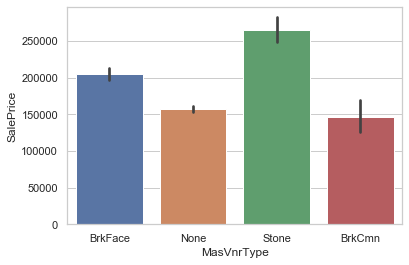

In [997]:
sns.barplot(x = 'MasVnrType', y = 'SalePrice', data = df_train) # This seems to be ordinal

In [998]:
df_train['MasVnrType'] = df_train['MasVnrType'].map({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2})
df_test['MasVnrType'] = df_test['MasVnrType'].map({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2})

In [999]:
for _ in mas_missing:
    col_to_impute.remove(_)

### 3.8 MS Zoning

In [1000]:
# df_train[df_train.MSZoning.isnull()] no for df_train
df_test[df_test.MSZoning.isnull()]['MSZoning'] # impute with mode

455     NaN
756     NaN
790     NaN
1444    NaN
Name: MSZoning, dtype: object

In [1001]:
df_test.MSZoning.fillna('RL', inplace = True)

In [1002]:
col_to_impute.remove('MSZoning')

### 3.9 Remaining Ones

In [1003]:
remain_missing = col_to_impute.copy()

In [1004]:
# df_train[remain_missing].isnull().sum() # One for electrical
# df_test[remain_missing].isnull().sum() # Functional, SaleType, KitchenQual, Utilities 2112

In [1005]:
df_test.KitchenQual.fillna('TA', inplace = True)
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})

In [1006]:
#df_train.Utilities.value_counts()
#df_test.Utilities.value_counts() 
#Nearly all variables have AllPub for utilities, which this variable is useless. # We simply drop this column

In [1007]:
df_train.drop('Utilities', axis = 1, inplace = True)
df_test.drop('Utilities', axis = 1, inplace = True)

In [1008]:
# Home functinality
df_train['Functional'].isnull().sum()
df_test['Functional'].isnull().sum() # 0 for training 2 NA for test
df_test['Functional'].fillna('Typ', inplace = True) # Also, this variable seems to be ordinal

In [1009]:
df_train['Functional'] = df_train['Functional'].map({'Sal':0, 'Sev':2, 
                                                     'Maj2':3, 'Maj1':5, 'Mod':6, 'Min2':8, 'Min1':9, 'Typ':10})
df_test['Functional'] = df_test['Functional'].map({'Sal':0, 'Sev':2, 
                                                     'Maj2':3, 'Maj1':5, 'Mod':6, 'Min2':8, 'Min1':9, 'Typ':10})

In [1010]:
df_train['Electrical'].isnull().sum()
df_test['Electrical'].isnull().sum()
df_train['Electrical'].fillna('SBrkr', inplace = True) #impute with mode, standard # this variable seems categorical

In [1011]:
df_train['SaleType'].isnull().sum()
df_test['SaleType'].isnull().sum()
df_test['SaleType'].fillna('WD', inplace = True) # impute with mode, this variable seems categorical

### 3.10 Creating Dummies For the Inspected Variables In this Section

In [1012]:
MS_dummy = pd.get_dummies(df_train['MSZoning'], prefix='MS', prefix_sep='__', drop_first = True)
Alley_dummy = pd.get_dummies(df_train['Alley'], prefix='Alley', prefix_sep='__', drop_first = True)
LC_dummy = pd.get_dummies(df_train['LotConfig'], prefix='LC', prefix_sep='__', drop_first = True)
E1_dummy = pd.get_dummies(df_train['Exterior1st'], prefix='E1', prefix_sep='__', drop_first = True)
E2_dummy = pd.get_dummies(df_train['Exterior2nd'], prefix='E2', prefix_sep='__', drop_first = True)
Elec_dummy = pd.get_dummies(df_train['Electrical'], prefix='Elec', prefix_sep='__', drop_first = True)
GaType_dummy = pd.get_dummies(df_train['GarageType'], prefix='GaType', prefix_sep='__', drop_first = True)
Fence_dummy = pd.get_dummies(df_train['Fence'], prefix='Fence', prefix_sep='__', drop_first = True)
Misc_dummy = pd.get_dummies(df_train['MiscFeature'], prefix='Misc', prefix_sep='__', drop_first = True)
ST_dummy = pd.get_dummies(df_train['SaleType'], prefix='ST', prefix_sep='__', drop_first = True)
SC_dummy = pd.get_dummies(df_train['SaleCondition'], prefix='SC', prefix_sep='__', drop_first = True)

df_train = pd.concat([df_train.drop('MSZoning', axis=1), MS_dummy], axis=1)
df_train = pd.concat([df_train.drop('Alley', axis=1), Alley_dummy], axis=1)
df_train = pd.concat([df_train.drop('LotConfig', axis=1), LC_dummy], axis=1)
df_train = pd.concat([df_train.drop('Exterior1st', axis=1), E1_dummy], axis=1)
df_train = pd.concat([df_train.drop('Exterior2nd', axis=1), E2_dummy], axis=1)
df_train = pd.concat([df_train.drop('Electrical', axis=1), Elec_dummy], axis=1)
df_train = pd.concat([df_train.drop('GarageType', axis=1), GaType_dummy], axis=1)
df_train = pd.concat([df_train.drop('Fence', axis=1), Fence_dummy], axis=1)
df_train = pd.concat([df_train.drop('MiscFeature', axis=1), Misc_dummy], axis=1)
df_train = pd.concat([df_train.drop('SaleType', axis=1), ST_dummy], axis=1)
df_train = pd.concat([df_train.drop('SaleCondition', axis=1), SC_dummy], axis=1)

In [1013]:
MS_dummy1 = pd.get_dummies(df_test['MSZoning'], prefix='MS', prefix_sep='__', drop_first = True)
Alley_dummy1 = pd.get_dummies(df_test['Alley'], prefix='Alley', prefix_sep='__', drop_first = True)
LC_dummy1 = pd.get_dummies(df_test['LotConfig'], prefix='LC', prefix_sep='__', drop_first = True)
E1_dummy1 = pd.get_dummies(df_test['Exterior1st'], prefix='E1', prefix_sep='__', drop_first = True)
E2_dummy1 = pd.get_dummies(df_test['Exterior2nd'], prefix='E2', prefix_sep='__', drop_first = True)
Elec_dummy1 = pd.get_dummies(df_test['Electrical'], prefix='Elec', prefix_sep='__', drop_first = True)
GaType_dummy1 = pd.get_dummies(df_test['GarageType'], prefix='GaType', prefix_sep='__', drop_first = True)
Fence_dummy1 = pd.get_dummies(df_test['Fence'], prefix='Fence', prefix_sep='__', drop_first = True)
Misc_dummy1 = pd.get_dummies(df_test['MiscFeature'], prefix='Misc', prefix_sep='__', drop_first = True)
ST_dummy1 = pd.get_dummies(df_test['SaleType'], prefix='ST', prefix_sep='__', drop_first = True)
SC_dummy1 = pd.get_dummies(df_test['SaleCondition'], prefix='SC', prefix_sep='__', drop_first = True)

df_test = pd.concat([df_test.drop('MSZoning', axis=1), MS_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Alley', axis=1), Alley_dummy1], axis=1)
df_test = pd.concat([df_test.drop('LotConfig', axis=1), LC_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Exterior1st', axis=1), E1_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Exterior2nd', axis=1), E2_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Electrical', axis=1), Elec_dummy1], axis=1)
df_test = pd.concat([df_test.drop('GarageType', axis=1), GaType_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Fence', axis=1), Fence_dummy1], axis=1)
df_test = pd.concat([df_test.drop('MiscFeature', axis=1), Misc_dummy1], axis=1)
df_test = pd.concat([df_test.drop('SaleType', axis=1), ST_dummy1], axis=1)
df_test = pd.concat([df_test.drop('SaleCondition', axis=1), SC_dummy1], axis=1)

In [1014]:
print(df_train.shape)
print(df_test.shape) # difference lie in dummies

(1460, 139)
(1459, 133)


## 4. Remaining Categorical Variable Enconding

In [1015]:
print(list(df_train.columns[df_train.dtypes == 'object']))

['Street', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive']


### 4.1 Heating and A/C

In [1016]:
hac = ['Heating', 'HeatingQC', 'CentralAir']
df_train[hac[0]].value_counts() # Heating is very skewed, with 1428 GasA
df_train[hac[1]].value_counts() # Average Spread
df_train[hac[2]].value_counts() # Y/N mostly Yes, inbalance classes

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1017]:
# Dummify Heating
Heat_dummy = pd.get_dummies(df_train['Heating'], prefix='Heat', prefix_sep='__', drop_first = True)
Heat_dummy1 = pd.get_dummies(df_test['Heating'], prefix='Heat', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('Heating', axis=1), Heat_dummy], axis=1)
df_test = pd.concat([df_test.drop('Heating', axis=1), Heat_dummy1], axis=1)

In [1018]:
df_train['HeatingQC'] = df_train['HeatingQC'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})
df_test['HeatingQC'] = df_test['HeatingQC'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})

In [1019]:
df_train['CentralAir'] = df_train['CentralAir'].map({'Y':1,'N':0})
df_test['CentralAir'] = df_test['CentralAir'].map({'Y':1,'N':0})

### 4.2 Roof

In [1020]:
rf = ['RoofStyle', 'RoofMatl']

In [1021]:
df_train[rf[0]].value_counts()
df_train[rf[1]].value_counts() # Need to dummify both

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

In [1022]:
RStyle_dummy = pd.get_dummies(df_train['RoofStyle'], prefix='RStyle', prefix_sep='__', drop_first = True)
RStyle_dummy1 = pd.get_dummies(df_test['RoofStyle'], prefix='RStyle', prefix_sep='__', drop_first = True)
RMatl_dummy = pd.get_dummies(df_train['RoofMatl'], prefix='RMatl', prefix_sep='__', drop_first = True)
RMatl_dummy1 = pd.get_dummies(df_test['RoofMatl'], prefix='RMatl', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('RoofStyle', axis=1), RStyle_dummy], axis=1)
df_test = pd.concat([df_test.drop('RoofStyle', axis=1), RStyle_dummy1], axis=1)
df_train = pd.concat([df_train.drop('RoofMatl', axis=1), RMatl_dummy], axis=1)
df_test = pd.concat([df_test.drop('RoofMatl', axis=1), RMatl_dummy1], axis=1)

### 4.3 Land/Building/House

In [1023]:
df_train.LandContour.value_counts() # seems to be categorical dummify it

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [1024]:
LContour_dummy = pd.get_dummies(df_train['LandContour'], prefix='LContour', prefix_sep='__', drop_first = True)
LContour_dummy1 = pd.get_dummies(df_test['LandContour'], prefix='LContour', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('LandContour', axis=1), LContour_dummy], axis=1)
df_test = pd.concat([df_test.drop('LandContour', axis=1), LContour_dummy1], axis=1)

In [1025]:
df_train.LandSlope.value_counts() # According to distribution # but this variable seems very inbalanced

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

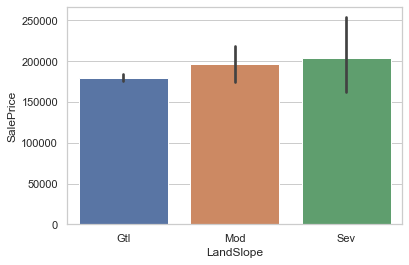

In [1026]:
sns.barplot(x = "LandSlope", y = "SalePrice", data = df_train) # seems there is a relation, we will encode it

In [1027]:
df_train['LandSlope'] = df_train['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2})
df_test['LandSlope'] = df_test['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2})

In [1028]:
BType_dummy = pd.get_dummies(df_train['BldgType'], prefix='BType', prefix_sep='__', drop_first = True)
BType_dummy1 = pd.get_dummies(df_test['BldgType'], prefix='BType', prefix_sep='__', drop_first = True)
HStyle_dummy = pd.get_dummies(df_train['HouseStyle'], prefix='HStyle', prefix_sep='__', drop_first = True)
HStyle_dummy1 = pd.get_dummies(df_test['HouseStyle'], prefix='HStyle', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('BldgType', axis=1), BType_dummy], axis=1)
df_test = pd.concat([df_test.drop('BldgType', axis=1), BType_dummy1], axis=1)
df_train = pd.concat([df_train.drop('HouseStyle', axis=1), HStyle_dummy], axis=1)
df_test = pd.concat([df_test.drop('HouseStyle', axis=1), HStyle_dummy1], axis=1)

### 4.4 Street

In [1029]:
df_train['Street'] = df_train['Street'].map({'Grvl':0, 'Pave':1})
df_test['Street'] = df_test['Street'].map({'Grvl':0, 'Pave':1}) # It's like yes or no

In [1030]:
df_train['PavedDrive'] = df_train['PavedDrive'].map({'N':0, 'P':1, 'Y':2}) # This is like the extent of pave
df_test['PavedDrive'] = df_test['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

### 4.5 Neighborhood

In [1031]:
# It spreads all over the place, we would just dummify it
# Neigh_dummy = pd.get_dummies(df_train['Neighborhood'], prefix='Neigh', prefix_sep='__', drop_first = True)
# Neigh_dummy1 = pd.get_dummies(df_test['Neighborhood'], prefix='Neigh', prefix_sep='__', drop_first = True)
# df_train = pd.concat([df_train.drop('Neighborhood', axis=1), Neigh_dummy], axis=1)
# df_test = pd.concat([df_test.drop('Neighborhood', axis=1), Neigh_dummy1], axis=1)

### 4.6 Others

In [1032]:
# Condition 1 and Condition 2 are quite unbalanced but they still spread over the place we would dummify it anyway
Co1_dummy = pd.get_dummies(df_train['Condition1'], prefix='Co1', prefix_sep='__', drop_first = True)
Co1_dummy1 = pd.get_dummies(df_test['Condition1'], prefix='Co1', prefix_sep='__', drop_first = True)
Co2_dummy = pd.get_dummies(df_train['Condition2'], prefix='Co2', prefix_sep='__', drop_first = True)
Co2_dummy1 = pd.get_dummies(df_test['Condition2'], prefix='Co2', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('Condition1', axis=1), Co1_dummy], axis=1)
df_test = pd.concat([df_test.drop('Condition1', axis=1), Co1_dummy1], axis=1)
df_train = pd.concat([df_train.drop('Condition2', axis=1), Co2_dummy], axis=1)
df_test = pd.concat([df_test.drop('Condition2', axis=1), Co2_dummy1], axis=1)

In [1033]:
# Foundation seems to spread in many categories, we would dummify it 
Foun_dummy = pd.get_dummies(df_train['Foundation'], prefix='Foun', prefix_sep='__', drop_first = True)
Foun_dummy1 = pd.get_dummies(df_test['Foundation'], prefix='Foun', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('Foundation', axis=1), Foun_dummy], axis=1)
df_test = pd.concat([df_test.drop('Foundation', axis=1), Foun_dummy1], axis=1)

In [1034]:
print(df_train.shape)
print(df_test.shape)

(1460, 181)
(1459, 165)


### 4.7 Others Others

Though some variables are numerical, they actually used for categorical purposes and we will transform those variables to categorical.

In [1035]:
MSub_dummy = pd.get_dummies(df_train['MSSubClass'], prefix='MSub', prefix_sep='__', drop_first = True)
MSub_dummy1 = pd.get_dummies(df_test['MSSubClass'], prefix='MSub', prefix_sep='__', drop_first = True)
df_train = pd.concat([df_train.drop('MSSubClass', axis=1), MSub_dummy], axis=1)
df_test = pd.concat([df_test.drop('MSSubClass', axis=1), MSub_dummy1], axis=1)

In [1036]:
print(df_train.shape)
print(df_test.shape)

(1460, 194)
(1459, 179)


## 5 Feature Engineering

We first combine porch bathroom and square footage

In [1217]:
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath'])) 
# 0.5 means less influence on the salePrice
df_train.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis = 1, inplace = True)
df_test.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis = 1, inplace = True)

KeyError: 'FullBath'

In [1207]:
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])
df_test['Total_porch_sf'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF'])
df_train.drop(['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis = 1, inplace = True)
df_test.drop(['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis = 1, inplace = True)

In [1300]:
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])

In [1302]:
df_train['Total_porch_sf'].skew()

1.102313211663996

In [1208]:
df_train['Total_SF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_test['Total_SF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']
df_train.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1, inplace = True)
df_test.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1, inplace = True)

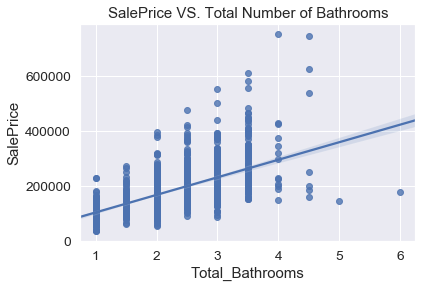

In [1256]:
total_bath = sns.regplot(x = "Total_Bathrooms", y = "SalePrice", data = df_train)
total_bath.set(title = "SalePrice VS. Total Number of Bathrooms")
plt.show()

In [1246]:
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'] )
df_train['Total_porch_sf'].corr(df_train['SalePrice'])

0.3909930203595834

In [1243]:
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_Bathrooms'].corr(df_train['SalePrice'])

0.6317310679319873

In [1213]:
df_train['Total_Bathrooms'].corr(df_train['SalePrice'])

0.6317310679319873

In [1298]:
df_train['Total_SF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF'] -df_train['LowQualFinSF']
df_train['Total_SF'].corr(df_train['SalePrice'])

0.7822600527979846

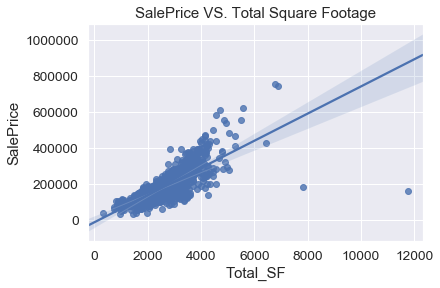

In [1299]:
total_sf = sns.regplot(x = "Total_SF", y = "SalePrice", data = df_train)
total_sf.set(title = "SalePrice VS.  Total Square Footage")
plt.show()

In [1218]:
df_train['Total_porch_sf'].corr(df_train['SalePrice'])

0.3909930203595834

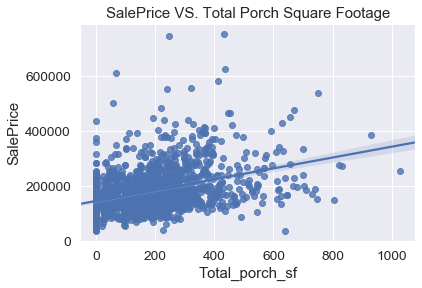

In [1259]:
total_porch = sns.regplot(x = "Total_porch_sf", y = "SalePrice", data = df_train)
total_porch.set(title = "SalePrice VS. Total Porch Square Footage")
plt.show()

We now deal with the neighborhoods, as there are just too many neighborhoods. We need to group the neighborhood somehow. By looking at the plot, we divide the neighboorhood into four groups.

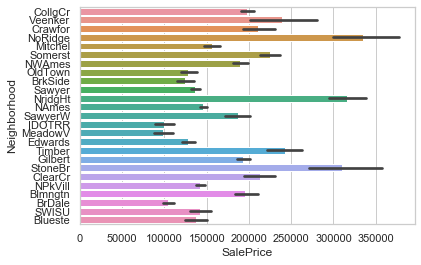

In [1040]:
sns.barplot(y = 'Neighborhood', x = 'SalePrice', data = df_train)

In [1041]:
group1 = ['StoneBr', 'NridgHt', 'NoRidge']
group4 = ['MeadowV', 'IDOTRR', 'BrDale']
group2 = ['SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn','CollgCr','Crawfor','ClearCr','Somerst','Veenker','Timber']
group3 = ['Mitchel', 'OldTown', 'BrkSide', 'Sawyer', 'NAmes', 'Edwards', 'NPkVill', 'SWISU', 'Blueste']

In [1042]:
df_train['richNeigh'] = df_train['Neighborhood']
df_test['richNeigh'] = df_test['Neighborhood']

In [1043]:
df_train.richNeigh.loc[df_train.richNeigh.isin(group1)] = 4
df_train.richNeigh.loc[df_train.richNeigh.isin(group2)] = 3
df_train.richNeigh.loc[df_train.richNeigh.isin(group3)] = 2
df_train.richNeigh.loc[df_train.richNeigh.isin(group4)] = 1
df_test.richNeigh.loc[df_test.richNeigh.isin(group1)] = 4
df_test.richNeigh.loc[df_test.richNeigh.isin(group2)] = 3
df_test.richNeigh.loc[df_test.richNeigh.isin(group3)]= 2
df_test.richNeigh.loc[df_test.richNeigh.isin(group4)] = 1

In [1044]:
df_train.drop('Neighborhood', axis = 1, inplace = True)
df_test.drop('Neighborhood', axis = 1, inplace = True)

In [1045]:
print(df_train.shape)
print(df_test.shape)

(1460, 186)
(1459, 171)


## 5 Transformation of Variables

### 5.1 Identify Outliers

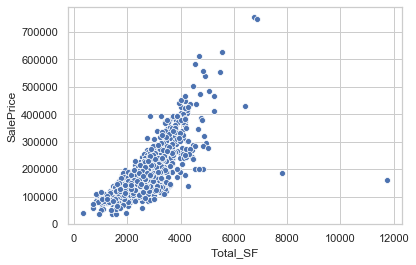

In [1046]:
sns.scatterplot(x = 'Total_SF', y = 'SalePrice', data = df_train)
# We can identify two outliers from the plot, two very large house that has a low saleprice

In [1047]:
df_train[df_train.Total_SF > 7800] # 523, 1298 are two outliers

,Id,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,HStyle__SFoyer,HStyle__SLvl,Co1__Feedr,Co1__Norm,Co1__PosA,Co1__PosN,Co1__RRAe,Co1__RRAn,Co1__RRNe,Co1__RRNn,Co2__Feedr,Co2__Norm,Co2__PosA,Co2__PosN,Co2__RRAe,Co2__RRAn,Co2__RRNn,Foun__CBlock,Foun__PConc,Foun__Slab,Foun__Stone,Foun__Wood,MSub__30,MSub__40,MSub__45,MSub__50,MSub__60,MSub__70,MSub__75,MSub__80,MSub__85,MSub__90,MSub__120,MSub__160,MSub__180,MSub__190,Total_Bathrooms,Total_porch_sf,Total_SF,richNeigh
523,524,130.0,40094,1,2,2,10,5,2007,2008,2,762.0,100,80,100,80,5,6,2260,1,0,878,100,1,3138,1538,0,3,1,100,11,10,1,80,2007.0,3,3,884,70,70,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.5,614,7814,2
1298,1299,313.0,63887,1,0,2,10,5,2008,2008,2,796.0,100,80,100,80,5,6,5644,1,0,466,100,1,4692,950,0,3,1,100,12,10,3,80,2008.0,3,2,1418,70,70,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.5,506,11752,2


In [1048]:
df_train = df_train[df_train.Total_SF < 7500]

In [1049]:
num_list1 = list(df_train.columns[df_train.dtypes != 'object'])

In [1050]:
# high_cor = index_retrieve(df_train[num_list1], 0.8, 'spearman')

In [1051]:
# spearman
# print(df_train.corr(method='spearman').SalePrice.sort_values(ascending=False).head(20))
# print('-'*55)

In [1052]:
# drop highly correlated variables
df_train.drop(['GarageYrBlt', 'GarageArea', 'GarageCond'],axis = 1 , inplace = True)
df_test.drop(['GarageYrBlt', 'GarageArea', 'GarageCond'],axis = 1 , inplace = True)

In [1053]:
num_list2 = num_list1[1:47] + num_list1[-4:]

In [1054]:
list_ = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold',
                 'YrSold', 'SalePrice','GarageArea','GarageYrBlt','GarageCond']
for _ in list_:
    num_list2.remove(_)

In [1055]:
# skewed_list = list(np.array(num_list2)[(abs(df_train[num_list2].skew()) > 1)])
# for skew in skewed_list:
#     df_train[skew] = np.log1p(df_train[skew])
# skewed_list1 = list(np.array(num_list2)[(abs(df_test[num_list2].skew()) > 1)])
# for skew in skewed_list1:
#     df_test[skew] = np.log1p(df_test[skew])

In [1056]:
# We now remove the sparse columns.

In [1068]:
train_cols = list(df_train.columns)
test_cols = list(df_test.columns)
train_absent = []
test_absent = []

In [1069]:
for col in train_cols:
    if col not in test_cols:
        test_absent.append(col)

for col in test_cols:
    if col not in train_cols:
        train_absent.append(col)

In [1070]:
test_absent.remove('SalePrice')
print(train_absent)
print(test_absent)

['LC__FR3', 'E2__Brk Cmn', 'ST__CWD', 'SC__AdjLand']
['E2__ImStucc', 'GaType__CarPort', 'Fence__MnWw', 'HStyle__1.5Unf', 'MSub__45', 'MSub__75', 'MSub__180']


In [1071]:
df_train.drop(test_absent, axis = 1, inplace = True)
df_test.drop(train_absent, axis = 1, inplace = True)

In [1072]:
df_train = df_train.loc[:, (df_train==0).mean() < .995]
df_test = df_test.loc[:, (df_test==0).mean() < .995]

In [1073]:
print(df_train.shape)
print(df_test.shape)

(1458, 128)
(1459, 127)


In [1074]:
df_train.drop('Id', axis = 1, inplace = True)

KeyError: "['Id'] not found in axis"

In [1064]:
df_test.drop('Id', axis = 1, inplace = True)

In [1075]:
df_train.to_csv('train_cleaned.csv')

In [1076]:
df_test.to_csv('test_cleaned.csv')

In [1067]:
df_train

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,MiscVal,MoSold,YrSold,...,LContour__HLS,LContour__Low,LContour__Lvl,BType__2fmCon,BType__Duplex,BType__Twnhs,BType__TwnhsE,HStyle__1.5Unf,HStyle__1Story,HStyle__2.5Unf,HStyle__2Story,HStyle__SFoyer,HStyle__SLvl,Co1__Feedr,Co1__Norm,Co1__PosA,Co1__PosN,Co1__RRAe,Co1__RRAn,Co2__Norm,Foun__CBlock,Foun__PConc,Foun__Slab,MSub__30,MSub__45,MSub__50,MSub__60,MSub__70,MSub__75,MSub__80,MSub__85,MSub__90,MSub__120,MSub__160,MSub__180,MSub__190,Total_Bathrooms,Total_porch_sf,Total_SF,richNeigh
0,65.0,8450,1,3,2,7,5,2003,2003,1,196.0,90,80,90,80,1,6,706,1,0,150,100,1,856,854,0,3,1,90,8,10,0,0,2,2,70,2,0,2,2008,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.5,61,2566,3
1,80.0,9600,1,3,2,6,8,1976,1976,0,0.0,80,80,90,80,5,5,978,1,0,284,100,1,1262,0,0,3,1,80,6,10,1,70,2,2,70,2,0,5,2007,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.5,298,2524,3
2,68.0,11250,1,2,2,7,5,2001,2002,1,162.0,90,80,90,80,3,6,486,1,0,434,100,1,920,866,0,3,1,90,6,10,1,70,2,2,70,2,0,9,2008,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.5,42,2706,3
3,60.0,9550,1,2,2,7,5,1915,1970,0,0.0,80,80,80,90,1,5,216,1,0,540,90,1,961,756,0,3,1,90,7,10,1,80,1,3,70,2,0,2,2006,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,307,2473,3
4,84.0,14260,1,2,2,8,5,2000,2000,1,350.0,90,80,90,80,4,6,655,1,0,490,100,1,1145,1053,0,4,1,90,9,10,1,70,2,3,70,2,0,12,2008,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.5,276,3343,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1,3,2,6,5,1999,2000,0,0.0,80,80,90,80,1,1,0,1,0,953,100,1,953,694,0,3,1,80,7,10,1,70,2,2,70,2,0,8,2007,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.5,40,2600,3
1456,85.0,13175,1,3,2,6,6,1978,1988,2,119.0,80,80,90,80,1,5,790,3,163,589,80,1,2073,0,0,3,1,80,7,9,2,70,1,2,70,2,0,2,2010,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,349,3615,3
1457,66.0,9042,1,3,2,7,9,1941,2006,0,0.0,100,90,80,90,1,6,275,1,0,877,100,1,1188,1152,0,4,1,90,9,10,2,80,2,1,70,2,2500,5,2010,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,60,3492,3
1458,68.0,9717,1,3,2,5,6,1950,1996,0,0.0,80,80,80,80,3,6,49,3,1029,0,90,1,1078,0,0,2,1,90,5,10,0,0,1,1,70,2,0,4,2010,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,478,2156,2


In [1277]:
a = pd.DataFrame(df_train.skew(), columns = ['skewness'])

In [1281]:
a.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Total_porch_sf', 'Total_Bathrooms',
       'Total_SF'],
      dtype='object')

[Text(0.5, 1.0, 'skewness plot')]

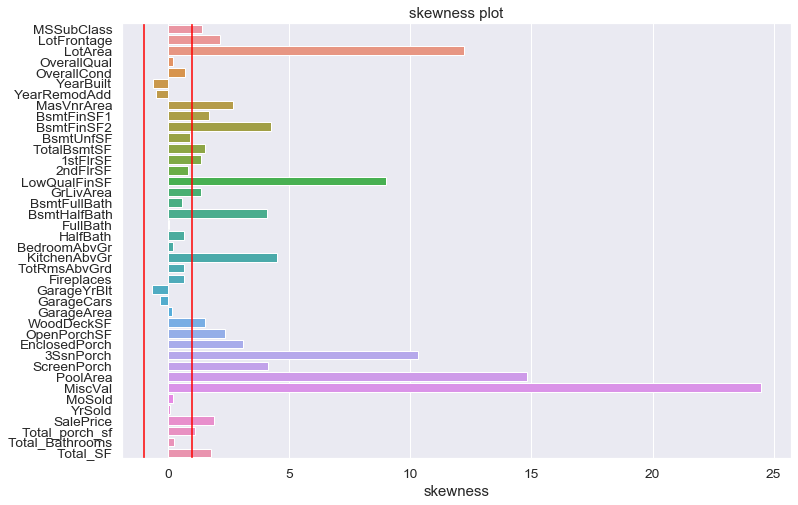

In [1287]:
f, ax = plt.subplots(figsize=(12, 8))
skew_plot = sns.barplot(y = a.index, x = "skewness", data = a, ax = ax)
plt.axvline(x = 1, color='red')
plt.axvline(x = -1, color='red')
skew_plot.set(title = "skewness plot")

[Text(0.5, 1.0, 'SalePrice before log transform')]

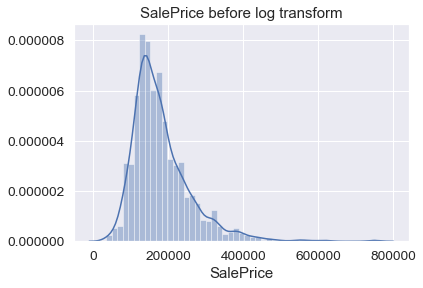

In [1290]:
sp_before = sns.distplot(df_train.SalePrice)
sp_before.set(title = "SalePrice before log transform")

[Text(0.5, 1.0, 'SalePrice after log transform')]

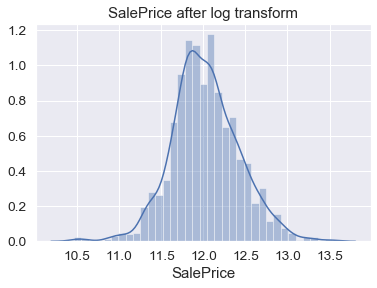

In [1291]:
sp_after = sns.distplot(np.log1p(df_train.SalePrice))
sp_after.set(title = "SalePrice after log transform")

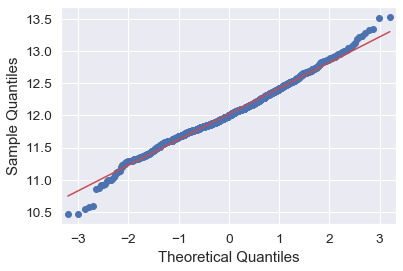

In [1297]:
import statsmodels.api as sm 
qq = sm.qqplot(np.log1p(df_train.SalePrice), line ='s')
plt.show()